# Plots for curve fitting

In [17]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
import pandas as pd

mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
sns.set_style('darkgrid')

In [2]:
rv = sp.norm().rvs(size=40)

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


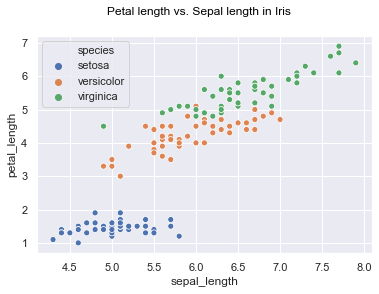

In [5]:
#fig = plt.figure(figsize=(8, 5))
plt.suptitle('Petal length vs. Sepal length in Iris')
sns.set(style='darkgrid')
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
#ax.set_ylim=(0,8)
#ax.set_xlim=(4,8)
plt.savefig("scatter.pdf")
#sns.despine()

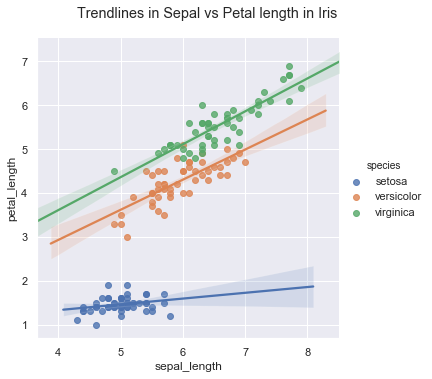

In [6]:
g = sns.lmplot(x='sepal_length', y='petal_length', hue='species', data=iris)
g.fig.suptitle('Trendlines in Sepal vs Petal length in Iris', y=1.05)
g.savefig("regplot.pdf")

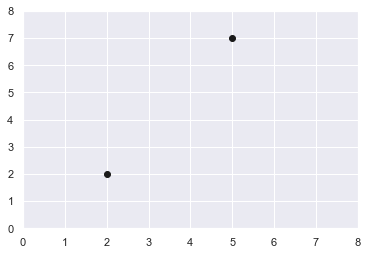

In [7]:
g, ax = plt.subplots(1,1)
x = np.array([2, 5])
y = np.array([2, 7])
ax.plot(x, y, '.k', markersize=12)
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
plt.savefig("dots.pdf")

<Figure size 432x288 with 0 Axes>

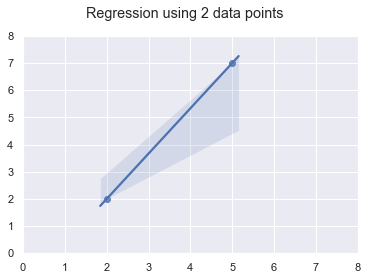

In [8]:
plt.clf()
g, ax = plt.subplots(1,1)
x = np.array([2, 5]).T
y = np.array([2, 7]).T
data = np.hstack((x, y))
sns.regplot(x, y)
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
plt.suptitle('Regression using 2 data points')
plt.savefig("reg01.pdf")

<Figure size 432x288 with 0 Axes>

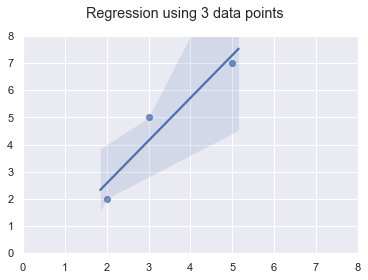

In [9]:
plt.clf()
g, ax = plt.subplots(1,1)
x = np.array([2, 5, 3]).T
y = np.array([2, 7, 5]).T
data = np.hstack((x, y))
sns.regplot(x, y)
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
plt.suptitle('Regression using 3 data points')
plt.savefig("reg02.pdf")

<Figure size 432x288 with 0 Axes>

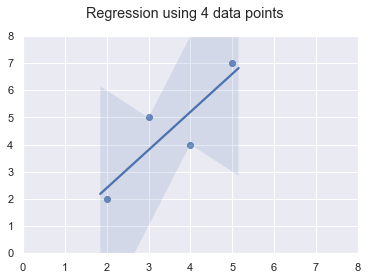

In [10]:
plt.clf()
g, ax = plt.subplots(1,1)
x = np.array([2, 5, 3, 4]).T
y = np.array([2, 7, 5, 4]).T
data = np.hstack((x, y))
sns.regplot(x, y)
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
plt.suptitle('Regression using 4 data points')
plt.savefig("reg03.pdf")

In [37]:
def f_linear(x):
    return 2*x + 2

def f_quad(x):
    return x ** 2 + 2 * x + 1

def f_cubic(x):
    return x ** 3 + 2 * x ** 2 - x - 2

x = np.linspace(-8, 8)

<Figure size 432x288 with 0 Axes>

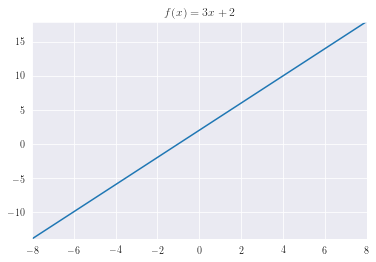

In [40]:
plt.clf()
g, ax = plt.subplots(1,1)
y = f_linear(x)
data = np.hstack((x, y))

sns.lineplot(x, y)
ax.set_xlim(x[0], x[-1])
ax.set_ylim(y[0], y[-1])
plt.title(r"$f(x) = 3x + 2$")
plt.savefig("linear.pdf")

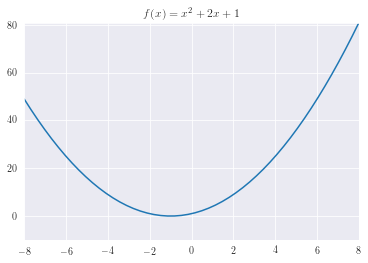

In [43]:
g, ax = plt.subplots(1,1)
y = f_quad(x)
data = np.hstack((x, y))

sns.lineplot(x, y)
ax.set_xlim(x[0], x[-1])
ax.set_ylim(-10, y[-1])
plt.title(r"$f(x) = x^2 + 2x + 1$")
plt.savefig("quad.pdf")

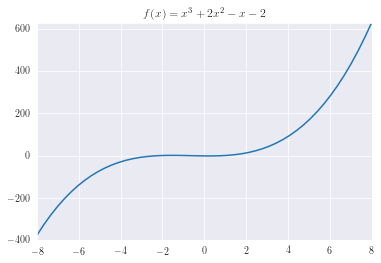

In [47]:
g, ax = plt.subplots(1,1)
y = f_cubic(x)
data = np.hstack((x, y))

sns.lineplot(x, y)
ax.set_xlim(x[0], x[-1])
ax.set_ylim(-400, y[-1])
plt.title(r"$f(x) = x^3 + 2x^2 - x - 2$")
plt.savefig("cubic.pdf")

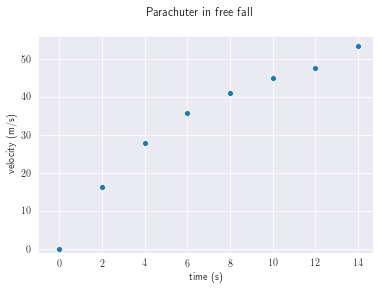

In [103]:
v = np.array([0, 16.42, 27.8, 35.68, 41.14, 44.92, 47.54, 53.44])
t = np.array(range(0, len(v))) * 2

g, ax = plt.subplots(1,1)
data = np.hstack((t, v))

sns.scatterplot(t, v)
ax.set_ylim(-1, 1.05 * v[-1])
ax.set_xlim(-1, 1.05 * t[-1])
ax.set_xlabel(r"time (s)")
ax.set_ylabel(r"velocity (m/s)")
plt.suptitle('Parachuter in free fall')
plt.savefig("parachuter.pdf")

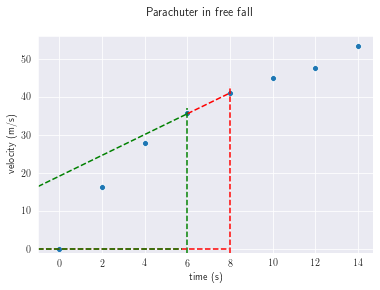

In [107]:
g, ax = plt.subplots(1,1)

cx = np.array([t[3], t[4]])
cy = np.array([v[3], v[4]])

m = (cy[1] - cy[0]) / (cx[1] - cx[0])
plt.plot(t[0:4], m * t[0:4] + 19.2, '--g')
plt.plot(np.array([-1, 0]), m * np.array([-1, 0]) + 19.2, '--g')
plt.plot(t[3:5], m * t[3:5] + 19.2, '--r')

sns.scatterplot(t, v)
ax.set_ylim(-1, 1.05 * v[-1])
ax.set_xlim(-1, 1.05 * t[-1])
plt.axvline(x=cx[1], ymax=cy[1]/v[-1], ls='--', color='red')
plt.axvline(x=cx[0], ymax=cy[0]/v[-1], ls='--', color='green')

plt.axhline(y=0, xmax=cx[1]/t[-1], ls='--', color='red')
plt.axhline(y=0, xmax=cx[0]/t[-1], ls='--', color='green')
# sns.regplot(cx, cy)
ax.set_xlabel(r"time (s)")
ax.set_ylabel(r"velocity (m/s)")
plt.suptitle('Parachuter in free fall')
plt.savefig("inter01.pdf")

In [120]:
np.polyfit(t, v, 7)

array([ 6.23139881e-06, -2.61718750e-04,  4.39322917e-03, -3.84635417e-02,
        2.12750000e-01, -1.23945833e+00,  1.00833095e+01, -3.01457752e-13])

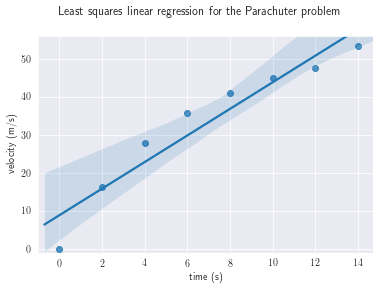

In [114]:
g, ax = plt.subplots(1,1)
data = np.hstack((t, v))

sns.regplot(t, v, order=1)
ax.set_ylim(-1, 1.05 * v[-1])
ax.set_xlim(-1, 1.05 * t[-1])
ax.set_xlabel(r"time (s)")
ax.set_ylabel(r"velocity (m/s)")
plt.suptitle('Least squares linear regression for the Parachuter problem')
plt.savefig("inter02.pdf")

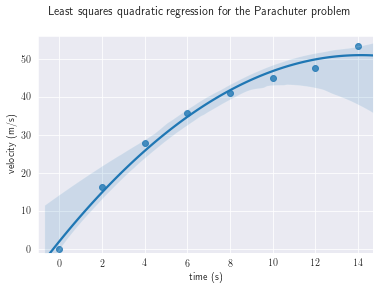

In [115]:
g, ax = plt.subplots(1,1)
data = np.hstack((t, v))

sns.regplot(t, v, order=2)
ax.set_ylim(-1, 1.05 * v[-1])
ax.set_xlim(-1, 1.05 * t[-1])
ax.set_xlabel(r"time (s)")
ax.set_ylabel(r"velocity (m/s)")
plt.suptitle('Least squares quadratic regression for the Parachuter problem')
plt.savefig("inter03.pdf")

C:\Users\Sax\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Sax\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Sax\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Sax\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Sax\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Sax\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order)

C:\Users\Sax\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Sax\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Sax\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Sax\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Sax\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Sax\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order)

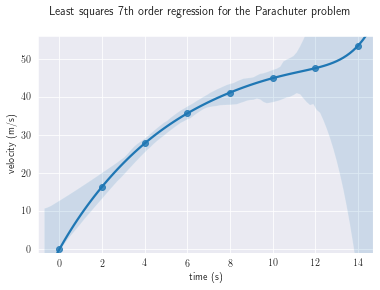

In [116]:
g, ax = plt.subplots(1,1)
data = np.hstack((t, v))

sns.regplot(t, v, order=7)
ax.set_ylim(-1, 1.05 * v[-1])
ax.set_xlim(-1, 1.05 * t[-1])
ax.set_xlabel(r"time (s)")
ax.set_ylabel(r"velocity (m/s)")
plt.suptitle('Least squares 7th order regression for the Parachuter problem')
plt.savefig("inter04.pdf")